# Practicum Data Augmentation

## Imports

In [8]:
# Voeg imports toe als je ze nodig hebt

## Bronnen

EuroSAT project: https://github.com/phelber/eurosat

Pytorch Vision: https://pytorch.org/vision/stable/index.html

## Context

De hoeveelheid data is vaak de beperkende factor in machine learning met convolution neural nets (CNN). In dit practicum vergroten we de EuroSAT dataset kunstmatig, zodat ons CNN meer variatie ziet om van te leren.

## Opdrachten

### Opdracht 1: dataset downloaden

Download de EuroSAT_RGB dataset.

Zie https://zenodo.org/record/7711810#.ZAm3k-zMKEA voor de beschrijving.

In [ ]:
# Extra: kun je de dataset ook met python downloaden?

# Hint: gebruik de requests module

### Opdracht 2: dataset inspecteren

Unzip de EuroSAT_RGB.zip in de folder van dit notebook (. path) en bekijk de inhoud.

In [ ]:
# Extra: kun je de dataset ook met python unzippen?

# Hint: gebruik de zipfile module

In [3]:
import requests

test = requests.get('https://zenodo.org/record/7711810/files/EuroSAT_RGB.zip?download=1')
test.status_code

200

In [5]:
with open('EuroSAT_RGB.zip', 'wb') as code:
    code.write(test.content)

In [10]:
import zipfile
with zipfile.ZipFile('EuroSAT_RGB.zip','r') as zip_ref:
    zip_ref.extractall('data')

### Opdracht 3/4: afbeelding inladen en tonen

PyTorch Vision maakt het inladen van afbeeldingen gemakkelijk via:

https://pytorch.org/vision/stable/io.html

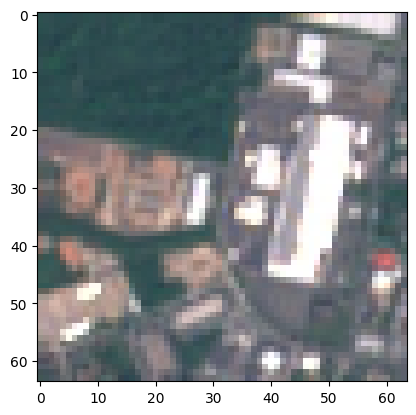

In [54]:
import torchvision
import matplotlib.pyplot as plt

industrial_1 = torchvision.io.read_image('./data/EuroSAT_RGB/Industrial/Industrial_1.jpg')

plt.imshow(industrial_1.permute(1,2,0))

In [44]:
industrial_1.shape

torch.Size([64, 64, 3])

### Opdracht 5: afbeelding bewerken

Ook augmentatie maakt PyTorch Vision makkelijk.

In [10]:
# a. Welke module is bedoeld voor het bewerken van afbeeldingen?

# b. Schaal de afbeelding op naar 2x de originele grootte (variable 'industrial_2x')

# c. Voer een willekeurige rotatie uit op de vergrote afbeelding (variable 'industrial_2x_rot')

# d. Converteer de bewerkte afbeelding naar grijstinten (variable 'industrial_2x_rot_gray')

# e. Sla de bewerkte afbeeldingen op

# f. Toon alle varianten in een grid

torch.Size([3, 128, 128])
<class 'torch.Tensor'>
torch.Size([3, 128, 128])
torch.Size([1, 128, 128])


d:\0_Program_Files\Python3.11\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


<Figure size 640x480 with 0 Axes>

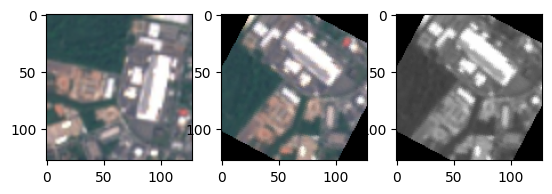

In [116]:
# torchvision.transforms.<method>

mag2x = torchvision.transforms.Resize(128)
industrial_2x = mag2x(industrial_1)
print(industrial_2x.shape)
print(type(industrial_2x))

rotimg = torchvision.transforms.RandomRotation([0,90])
industrial_rot = rotimg(industrial_2x)
print(industrial_rot.shape)

greyimg = torchvision.transforms.Grayscale()  #forgot () for method
industrial_2x_rot_grey = greyimg(industrial_rot)
print(industrial_2x_rot_grey.shape)


torchvision.io.write_png(industrial_2x,'industrial_2x.png')
torchvision.io.write_png(industrial_rot,'industrial_rot.png')
torchvision.io.write_png(industrial_2x_rot_grey,'industrial_rot_grey.png')

# test = industrial_2x.permute(1,2,0).numpy()
# print(type(test))
# print(test.shape)
# plt.imshow(test)

plt.figure()
f, axs = plt.subplots(1,3)

# axs[i] = plt.imshow(image) == pass the axes to the plotting functions, but inside of those you need to actually use those passed axes. 
# Else all the plt commands will apply to the currently active axes, which is the last one you create.
# with axs[0] = plt.imshow(image)  each axs[i] is treated as an individual axis object, and we use the imshow method of each axis to display the respective image

axs[0].imshow(industrial_2x.permute(1,2,0))
axs[1].imshow(industrial_rot.permute(1,2,0))
axs[2].imshow(industrial_2x_rot_grey.permute(1,2,0), cmap='gray', vmin=0, vmax=255) #for greyscale (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
plt.show()

### Reflectie

Zijn alle transformaties zinnig voor deze dataset?

In [ ]:
# Extra: Je kunt alle acties ook bundelen, zie: https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose

# a. Probeer nog een aantal transformaties uit en bundel ze als 1 tranformatie

In [142]:
# In order to script the transformations, please use torch.nn.Sequential instead of Compose.
import torch

mycomposition = torch.nn.Sequential(
                        torchvision.transforms.CenterCrop(100),
                        torchvision.transforms.RandomRotation([0,145]),
                        torchvision.transforms.RandomPosterize(2)
                )     

scripted_transforms = torch.jit.script(mycomposition)          

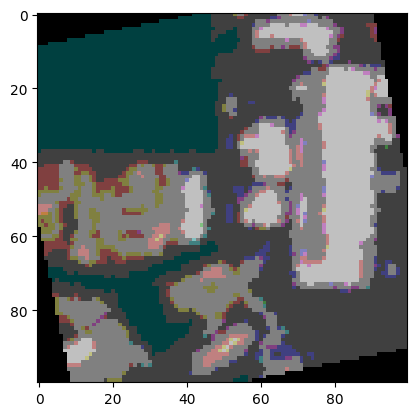

In [143]:
comp_image = scripted_transforms(industrial_2x)
plt.imshow(comp_image.permute(1,2,0))

### Opdracht 6: batch bewerkingen

Tot nu toe hebben we een enkele afbeelding bewerkt.

In [ ]:
# Generaliseer de bovenstaande stappen en batch-bewerk de Industrial folder

# The transformations that accept tensor images also accept batches of tensor images. 

